In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn import datasets
from sklearn import svm

# Reading Data

In [306]:
digits = datasets.load_digits()
x=digits.data
y=digits.target
x.shape

(1797, 64)

x  contain 1797 image each image with 8*8 pix

# Display Data

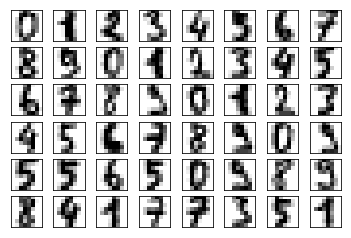

In [307]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat): 
    axi.imshow(x[i].reshape(8, 8), cmap='gray_r')

# use cross-validation to split the data

In [309]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

# Train the model

In [318]:
model=svm.SVC()

# Fine-Tune Model using GridSearchCV 


In [319]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'gamma':[0.01,0.001,0.005,0.002],
     'C' :[1,5,10,20,100]
}
grid_rf_class = GridSearchCV(
estimator = model,
param_grid = param_grid,
scoring='accuracy',
n_jobs=4,
cv = 5,
refit=True,
return_train_score=True)
grid_rf_class.fit(x_train,y_train)

C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'gamma': [0.01, 0.001, 0.005, 0.002], 'C': [1, 5, 10, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [323]:
grid_rf_class.best_params_


{'C': 5, 'gamma': 0.001}

In [325]:
y_pred=grid_rf_class.predict(x_test)  
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,new)
print(accuracy)

0.98989898989899


# confusion_matrix

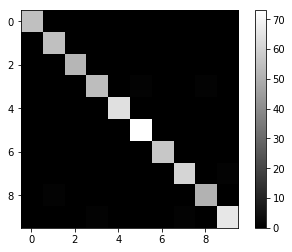

In [333]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()

In [331]:
confusion_mat

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 64,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 73,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 51,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  0, 66]], dtype=int64)

# Drawing Learning Curves

In [327]:

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None,train_sizes=np.linspace(0.1, 1.0, 10)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
    scoring = 'neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")   
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\ahmed\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

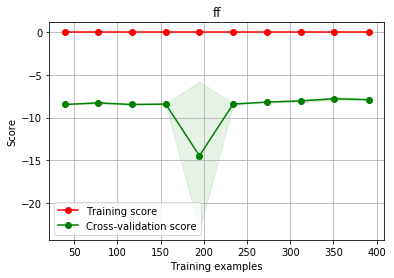

In [337]:
plot_learning_curve(model,"ff",x_test,y_test)